# Image capture from camera

In [1]:
from keras.models import load_model

model_imagecap_1 = load_model('model_1.h5')
model_imagecap_2 = load_model('model_2.h5')

Using TensorFlow backend.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
roi_top = 50
roi_bottom = 300
roi_right = 300
roi_left = 550

In [4]:
classes_list = ('airplane','car','cat',' dog','flower','fruit','motorbike','person')

In [5]:
def my_predict_fun(model, image):
    
    cv2.imshow('ROI',image)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    
    roi_resized = cv2.resize(image, (150, 150))
    roi_resized = roi_resized/255
    # plt.imshow(roi_resized)
    
    roi_resized = np.expand_dims(roi_resized,axis=0)
    
    predict = model.predict(roi_resized)[0]

    text = classes_list[np.argmax(predict)]
    return (predict, text)

In [6]:
def my_min_fun():
    camera = cv2.VideoCapture(0)

    num_frames = 0
    text = None

    while True:
        # standart inputs
        ret, frame = camera.read()

        frame_copy = frame.copy()

        roi = frame[roi_top:roi_bottom,roi_right:roi_left]

        cv2.rectangle(frame_copy,(roi_left,roi_top),(roi_right,roi_bottom),(0,0,255),5)

        # start
        key = cv2.waitKey(1) & 0xFF

        if key == 13:
            predict, text = my_predict_fun(model_imagecap_1, roi)
            print(predict)
            num_frames = 0
        elif key == 32:
            predict, text = my_predict_fun(model_imagecap_2, roi)
            print(predict)
            num_frames = 0

        # text
        if num_frames > 60:
            text = None
        cv2.putText(frame_copy, text,(200,350),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)


        # show
        cv2.imshow('Image test',frame_copy)

        # end of loop
        num_frames += 1
        if key == 27:
            break

    camera.release()
    cv2.destroyAllWindows()

[1.2908977e-09 2.0501467e-10 1.3861747e-06 2.5071925e-04 9.1710643e-07
 4.8452131e-07 1.0248641e-13 1.3069251e-01]
[8.2144923e-11 3.1762076e-10 5.0050249e-07 6.2779983e-04 5.7948200e-06
 8.5528109e-06 2.0427469e-13 9.9935740e-01]
[0.09759492 0.01788248 0.33489785 0.3038945  0.22133334 0.01000619
 0.00745619 0.00693445]
[1.1034650e-05 2.0260088e-06 4.6218779e-02 1.5362428e-03 4.6736878e-01
 1.7554594e-04 4.3550333e-08 1.0179399e-05]
[1.9231325e-01 3.6581911e-03 5.3384826e-02 6.4529786e-03 7.4374235e-01
 2.4514849e-04 1.7576489e-04 2.7531512e-05]
[3.5014105e-05 4.1222418e-05 1.9871651e-03 1.8949466e-03 1.3581403e-01
 1.6976394e-06 7.5583529e-08 6.1354192e-05]
[4.0156539e-03 1.4660499e-03 1.6977522e-01 7.3628396e-02 7.4976659e-01
 3.4367575e-04 3.0864065e-04 6.9581508e-04]


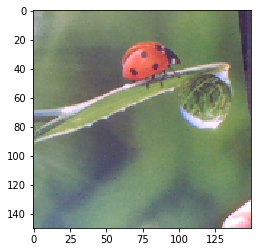

In [8]:
my_min_fun()

In [8]:
import numpy as np
from keras.preprocessing import image

file = '../DATA/my_img.jpg'

img = image.load_img(file, target_size=(150, 150))

img = image.img_to_array(img)

img = np.expand_dims(img, axis=0)
img = img/255

In [9]:
prediction_prob_1 = model_imagecap_1.predict(img)
prediction_prob_2 = model_imagecap_2.predict(img)

In [10]:
prediction_prob_1 = prediction_prob_1[0]
prediction_prob_2 = prediction_prob_2[0]
print(prediction_prob_1)
print(prediction_prob_2)

[8.5622683e-05 1.6333999e-05 1.2028230e-02 6.6222209e-03 1.6766731e-02
 2.5238318e-05 9.3672185e-07 3.8112666e-02]
[4.06093250e-07 2.02534212e-09 1.16871309e-03 9.64813749e-04
 8.12281814e-06 1.17176015e-07 8.61289720e-11 9.97857869e-01]


In [11]:
print(classes_list[np.argmax(prediction_prob_1)])
print(classes_list[np.argmax(prediction_prob_2)])

person
person
